In [1]:
import rioxarray as rxr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Open the NetCDF file
file_path = "/path/to/work/folder/data/OPERA_L3_DISP-S1_IW_F42779_VV_20180808T161251Z_20180820T161251Z_v0.9_20250122T013656Z.nc"  # Replace with your file path
data = rxr.open_rasterio(file_path, masked=True)

# Inspect the dataset
data

<xarray.Dataset> Size: 4GB
Dimensions:                        (band: 1, x: 9758, y: 7132)
Coordinates:
  * band                           (band) int64 8B 1
  * x                              (x) float64 78kB 3.35e+05 ... 6.277e+05
  * y                              (y) float64 57kB 6.897e+06 ... 6.683e+06
    spatial_ref                    int64 8B 0
Data variables: (12/13)
    displacement                   (band, y, x) float32 278MB ...
    phase_similarity               (band, y, x) float32 278MB ...
    ionospheric_delay              (band, y, x) float32 278MB ...
    solid_earth_tide               (band, y, x) float32 278MB ...
    perpendicular_baseline         (band, y, x) float64 557MB ...
    short_wavelength_displacement  (band, y, x) float32 278MB ...
    ...                             ...
    connected_component_labels     (band, y, x) float32 278MB ...
    temporal_coherence             (band, y, x) float32 278MB ...
    estimated_phase_quality        (band, y, x) float32 278MB ...
    persistent_scatterer_mask      (band, y, x) float32 278MB ...
    shp_counts                     (band, y, x) float32 278MB ...
    water_mask                     (band, y, x) float32 278MB ...
Attributes:
    description:         Phase corrections applied to the unwrapped_phase
    contact:             opera-sds-ops@jpl.nasa.gov
    Conventions:         CF-1.8
    institution:         NASA JPL
    mission_name:        OPERA
    reference_document:  JPL D–108765
    title:               OPERA_L3_DISP-S1 Product

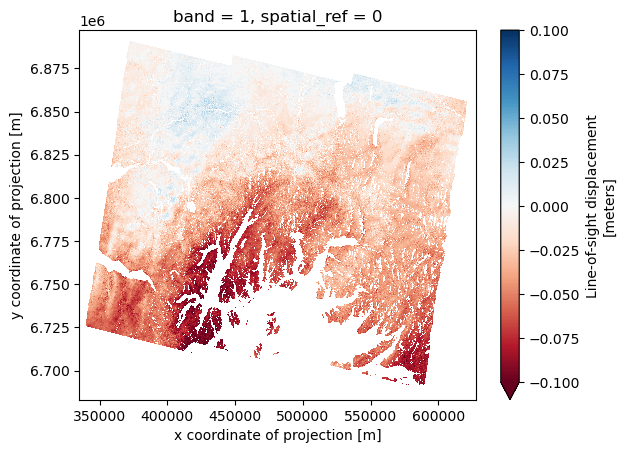

In [4]:
# View one layer: displacement layer
data.displacement.where(data.water_mask > 0).plot(cmap='RdBu', vmin=-.1, vmax=.1)

Variables in dataset: ['displacement', 'phase_similarity', 'ionospheric_delay', 'solid_earth_tide', 'perpendicular_baseline', 'short_wavelength_displacement', 'recommended_mask', 'connected_component_labels', 'temporal_coherence', 'estimated_phase_quality', 'persistent_scatterer_mask', 'shp_counts', 'water_mask']


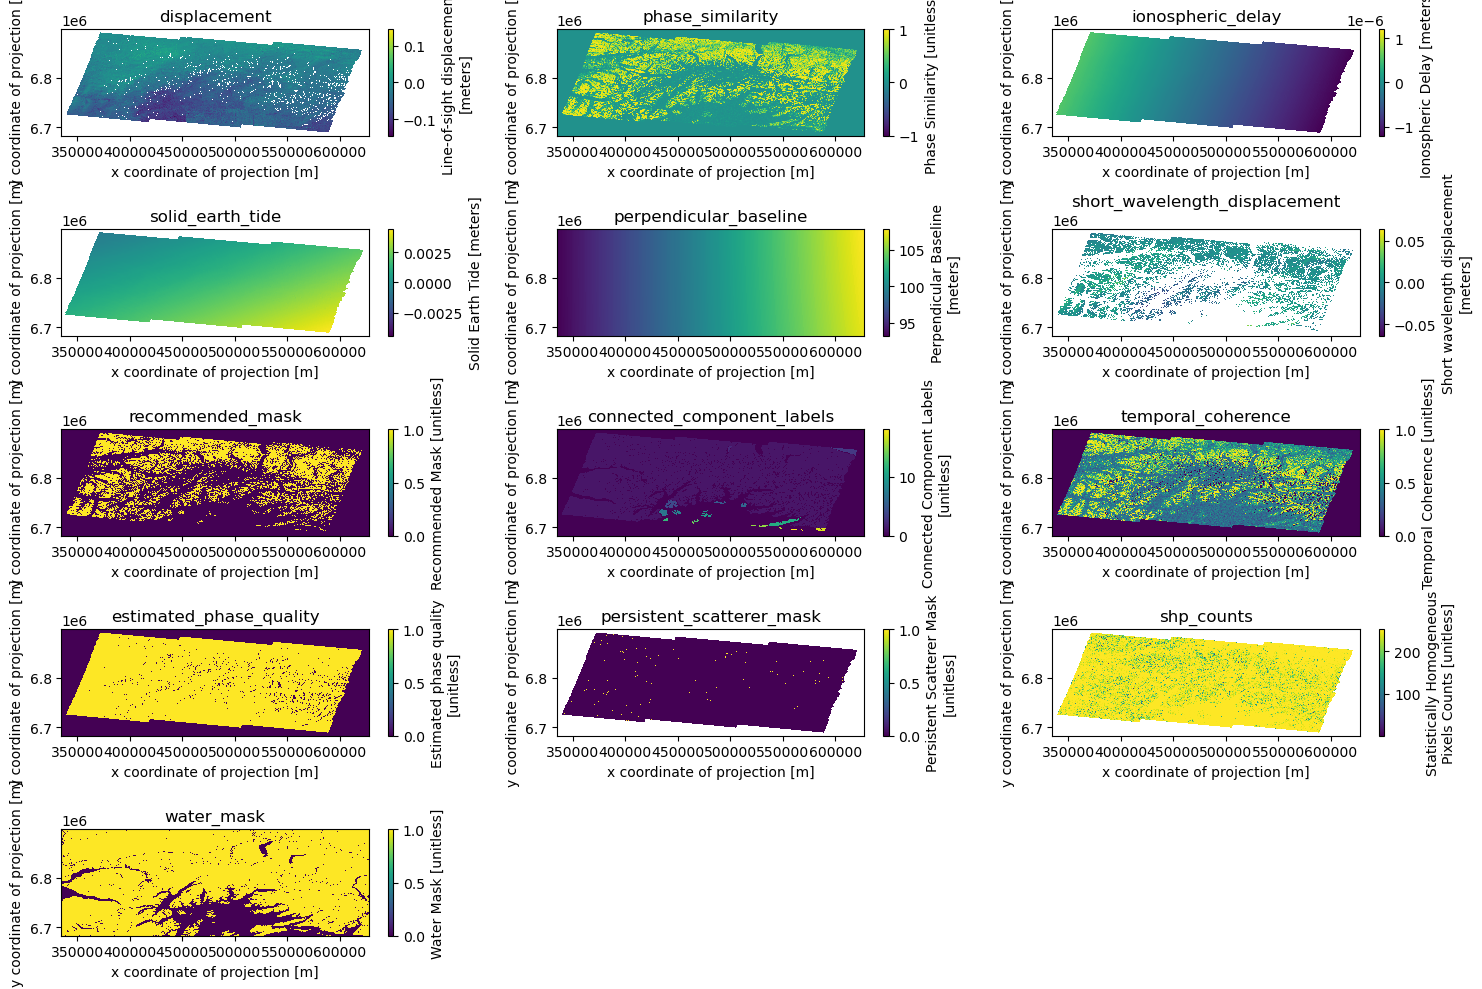

In [5]:
# List all data variables
variables = list(data.data_vars.keys())
print(f"Variables in dataset: {variables}")

# Determine grid layout
num_vars = len(variables)
grid_cols = int(num_vars ** 0.5)
grid_rows = (num_vars // grid_cols) + (num_vars % grid_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop through variables and plot
for i, var_name in enumerate(variables):
    data_ = data[var_name]
    data_.plot(ax=axes[i], cmap="viridis", add_colorbar=True)
    axes[i].set_title(var_name)

# Hide unused subplots
for j in range(num_vars, len(axes)):
    axes[j].set_visible(False)

# Adjust layout and show
plt.tight_layout()
plt.show()